# Analysis Tools with AP

**Description:** Introduction to generating science performance diagnostic plots and metrics with the [analysis_tools](https://github.com/lsst/analysis_tools) package using an AP dataset

**Contact authors:** Eric Bellm

**Last verified to run:** 

**LSST Science Piplines version:** 

**Container size:** medium

**Targeted learning level:** intermediate

**Skills:** 


## Preliminaries

In [1]:
# Basic imports
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from pprint import pprint

### Getting set up at USDF

See documentation at
* https://developer.lsst.io/usdf/lsst-login.html
* https://developer.lsst.io/usdf/onboarding.html

### dataset

We'll use an ap_verify repo while we await /repo/main

### Setting up the analysis_tools package

Check the version of the stack you are using

In [2]:
!eups list -s | grep lsst_distrib

lsst_distrib          g0b29ad24fb+cafeaf151e 	current w_2022_32 setup


The `analysis_tools` package was added to `lsst_distrib` in August 2022, and accordingly, if you have set up the LSST Stack version `w_2022_32` or later, then you should be able to import `analysis_tools` directly in the notebook.

In [3]:
import lsst.analysis.tools
print(lsst.analysis.tools.__file__)

/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-4.1.0/Linux64/analysis_tools/g794f078e44+7d9f6e5a16/python/lsst/analysis/tools/__init__.py


If you are doing development on the `analysis_tools` package and want to test in a notebook, follow the guidance [here](https://nb.lsst.io/science-pipelines/development-tutorial.html). Brief version below (for work on the RSP at USDF):

1. In the termal, clone the [analysis_tools](https://github.com/lsst/analysis_tools) repo and set up the package

```
source /opt/lsst/software/stack/loadLSST.bash
setup lsst_distrib

# Choose file location for your repo
cd ~/repos/
git clone https://github.com/lsst/analysis_tools.git
cd analysis_tools
setup -k -r .
scons
```

2. Add the following line to `~/notebooks/.user_setups`

```
setup -k -r ~/repos/analysis_tools
```

Your local version of `analysis_tools` should now be accessible in a notebook.

## Generating consistent metric values and visualizations

### Load data for testing

In [4]:
from lsst.daf.butler import Butler

repo = "/sdf/group/rubin/u/ebellm/workspace/cosmos/repo"
collection = "ap_verify-output"

butler = Butler(repo, collections=[collection])
registry = butler.registry

In [5]:
# Display the available dataset types
for d in sorted(registry.queryDatasetTypes()): print(d.name)

apFakesCompletenessMag20t22_config
apFakesCompletenessMag20t22_log
apFakesCompletenessMag20t22_metadata
apFakesCompletenessMag22t24_config
apFakesCompletenessMag22t24_log
apFakesCompletenessMag22t24_metadata
apFakesCompletenessMag24t26_config
apFakesCompletenessMag24t26_log
apFakesCompletenessMag24t26_metadata
apFakesCountMag20t22_config
apFakesCountMag20t22_log
apFakesCountMag20t22_metadata
apFakesCountMag22t24_config
apFakesCountMag22t24_log
apFakesCountMag22t24_metadata
apFakesCountMag24t26_config
apFakesCountMag24t26_log
apFakesCountMag24t26_metadata
apFakesCount_config
apFakesCount_log
apFakesCount_metadata
apdb_marker
bfKernel
bias
calexp
calexpBackground
calibrate_config
calibrate_log
calibrate_metadata
camera
characterizeImage_config
characterizeImage_log
characterizeImage_metadata
coaddFakes_config
coaddFakes_log
coaddFakes_metadata
createFakes_config
createFakes_log
createFakes_metadata
dark
deepCoadd
deepDiff_diaSrc
deepDiff_diaSrc_schema
deepDiff_differenceExp
deepDiff_diff

In [8]:
sorted(registry.queryDatasets("visitSsObjects"))

[DatasetRef(DatasetType('visitSsObjects', {band, instrument, physical_filter, visit}, DataFrame), {instrument: 'HSC', visit: 59150, ...}, id=3bcbc645-6ae2-4c0d-be68-ad8ad8c3803f, run='sso/cached'),
 DatasetRef(DatasetType('visitSsObjects', {band, instrument, physical_filter, visit}, DataFrame), {instrument: 'HSC', visit: 59160, ...}, id=87297025-294e-459b-9feb-4ef2a60ff873, run='sso/cached')]

In [11]:
dataset_refs = registry.queryDatasets("visitSsObjects")

In [13]:
for ref in dataset_refs:
    visitSsObjects = butler.getDirect(ref)
    break

In [14]:
visitSsObjects

,# Num,Name,RA(h),DE(deg),Class,Mv,Err(arcsec),d(arcsec),dRA(arcsec/h),dDEC(arcsec/h),Dg(ua),Dh(ua),Phase(deg),SunElong(deg),ra,decl,ssObjectId,visitId
0,276537,2003 SS69,09 59 25.3221,+02 17 18.893,MB>Outer,20.1,0.266,468.688,-24.7963,18.652,1.993131,2.949219,6.07,161.69,149.855509,2.288581,4362913742843557,59150
1,90301,2003 EN45,10 00 7.2039,+02 20 36.046,MB>Middle,20.1,0.080,498.548,-29.8606,16.355,1.947854,2.904845,6.10,161.87,150.030016,2.343346,10693262295262513,59150
2,191408,2003 SP86,09 59 19.8850,+02 08 15.678,MB>Outer,19.5,0.287,565.122,-28.1636,8.533,2.278084,3.232561,5.55,161.64,149.832854,2.137688,34336354418781717,59150
3,58778,1998 FS66,10 00 25.9732,+02 20 37.858,MB>Middle,17.9,0.303,676.739,-24.8298,25.984,1.482323,2.442637,7.23,161.95,150.108222,2.343849,54904870611948654,59150
4,-,2014 QZ446,09 59 1.9194,+02 10 45.359,MB>Middle,21.8,0.369,764.242,-27.6054,22.271,1.966145,2.921965,6.16,161.57,149.757997,2.179266,43396833545824840,59150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2103,Laverna,09 58 32.0530,+03 01 47.467,MB>Outer,14.4,0.061,3150.944,-28.5748,6.507,1.586103,2.544416,7.08,161.58,149.633554,3.029852,56526816693419612,59150
64,226785,2004 RP159,10 03 7.8856,+02 32 39.434,MB>Outer,20.2,0.435,3159.973,-29.5491,9.583,2.247813,3.206134,5.30,162.64,150.782857,2.544287,58405251280863445,59150
65,336869,2011 FP151,09 58 18.2490,+03 00 24.471,MB>Outer,19.6,0.254,3160.638,-36.2246,-2.107,1.902446,2.858441,6.32,161.52,149.576037,3.006797,49770400803606048,59150
66,-,2019 YQ33,10 01 30.3509,+02 59 56.695,MB>Middle,21.9,0.000,3168.010,-26.5369,21.397,1.955906,2.914416,5.94,162.31,150.376462,2.999082,68756701622902235,59150


In [15]:
# Show the column names
visitSsObjects.columns.values

array(['# Num', 'Name', 'RA(h)', 'DE(deg)', 'Class', 'Mv', 'Err(arcsec)',
       'd(arcsec)', 'dRA(arcsec/h)', 'dDEC(arcsec/h)', 'Dg(ua)', 'Dh(ua)',
       'Phase(deg)', 'SunElong(deg)', 'ra', 'decl', 'ssObjectId',
       'visitId'], dtype=object)

### Generate a metric

* Instantiate a butler, load some data
* Pass loaded data to an `AnalysisMetric` to compute metric values

In this example, we compute PSF model size residuals relative to the observed PSF size.

In [13]:
from lsst.analysis.tools.analysisMetrics import ShapeSizeFractionalMetric
from lsst.analysis.tools.tasks.base import _StandinPlotInfo

In [14]:
metric = ShapeSizeFractionalMetric()

In [15]:
results = metric(objectTable, band='i')

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [16]:
results

{'i_highSNStars_median': Measurement('i_highSNStars_median', <Quantity nan pix>),
 'i_highSNStars_sigmaMad': Measurement('i_highSNStars_sigmaMad', <Quantity nan pix>),
 'i_highSNStars_count': Measurement('i_highSNStars_count', <Quantity 0. ct>),
 'i_lowSNStars_median': Measurement('i_lowSNStars_median', <Quantity 0.00090387 pix>),
 'i_lowSNStars_sigmaMad': Measurement('i_lowSNStars_sigmaMad', <Quantity 0.00426081 pix>),
 'i_lowSNStars_count': Measurement('i_lowSNStars_count', <Quantity 217. ct>)}

### Generate a plot

* Use same data from example above
* Pass data to an analysis_tool to generate a plot and visualize in notebook
* Confirm that displayed values are consistent

In [17]:
from lsst.analysis.tools.analysisPlots import ShapeSizeFractionalDiffScatterPlot

In [18]:
plot = ShapeSizeFractionalDiffScatterPlot()
# set some configs, we will go into this later
plot.produce.addSummaryPlot = False

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


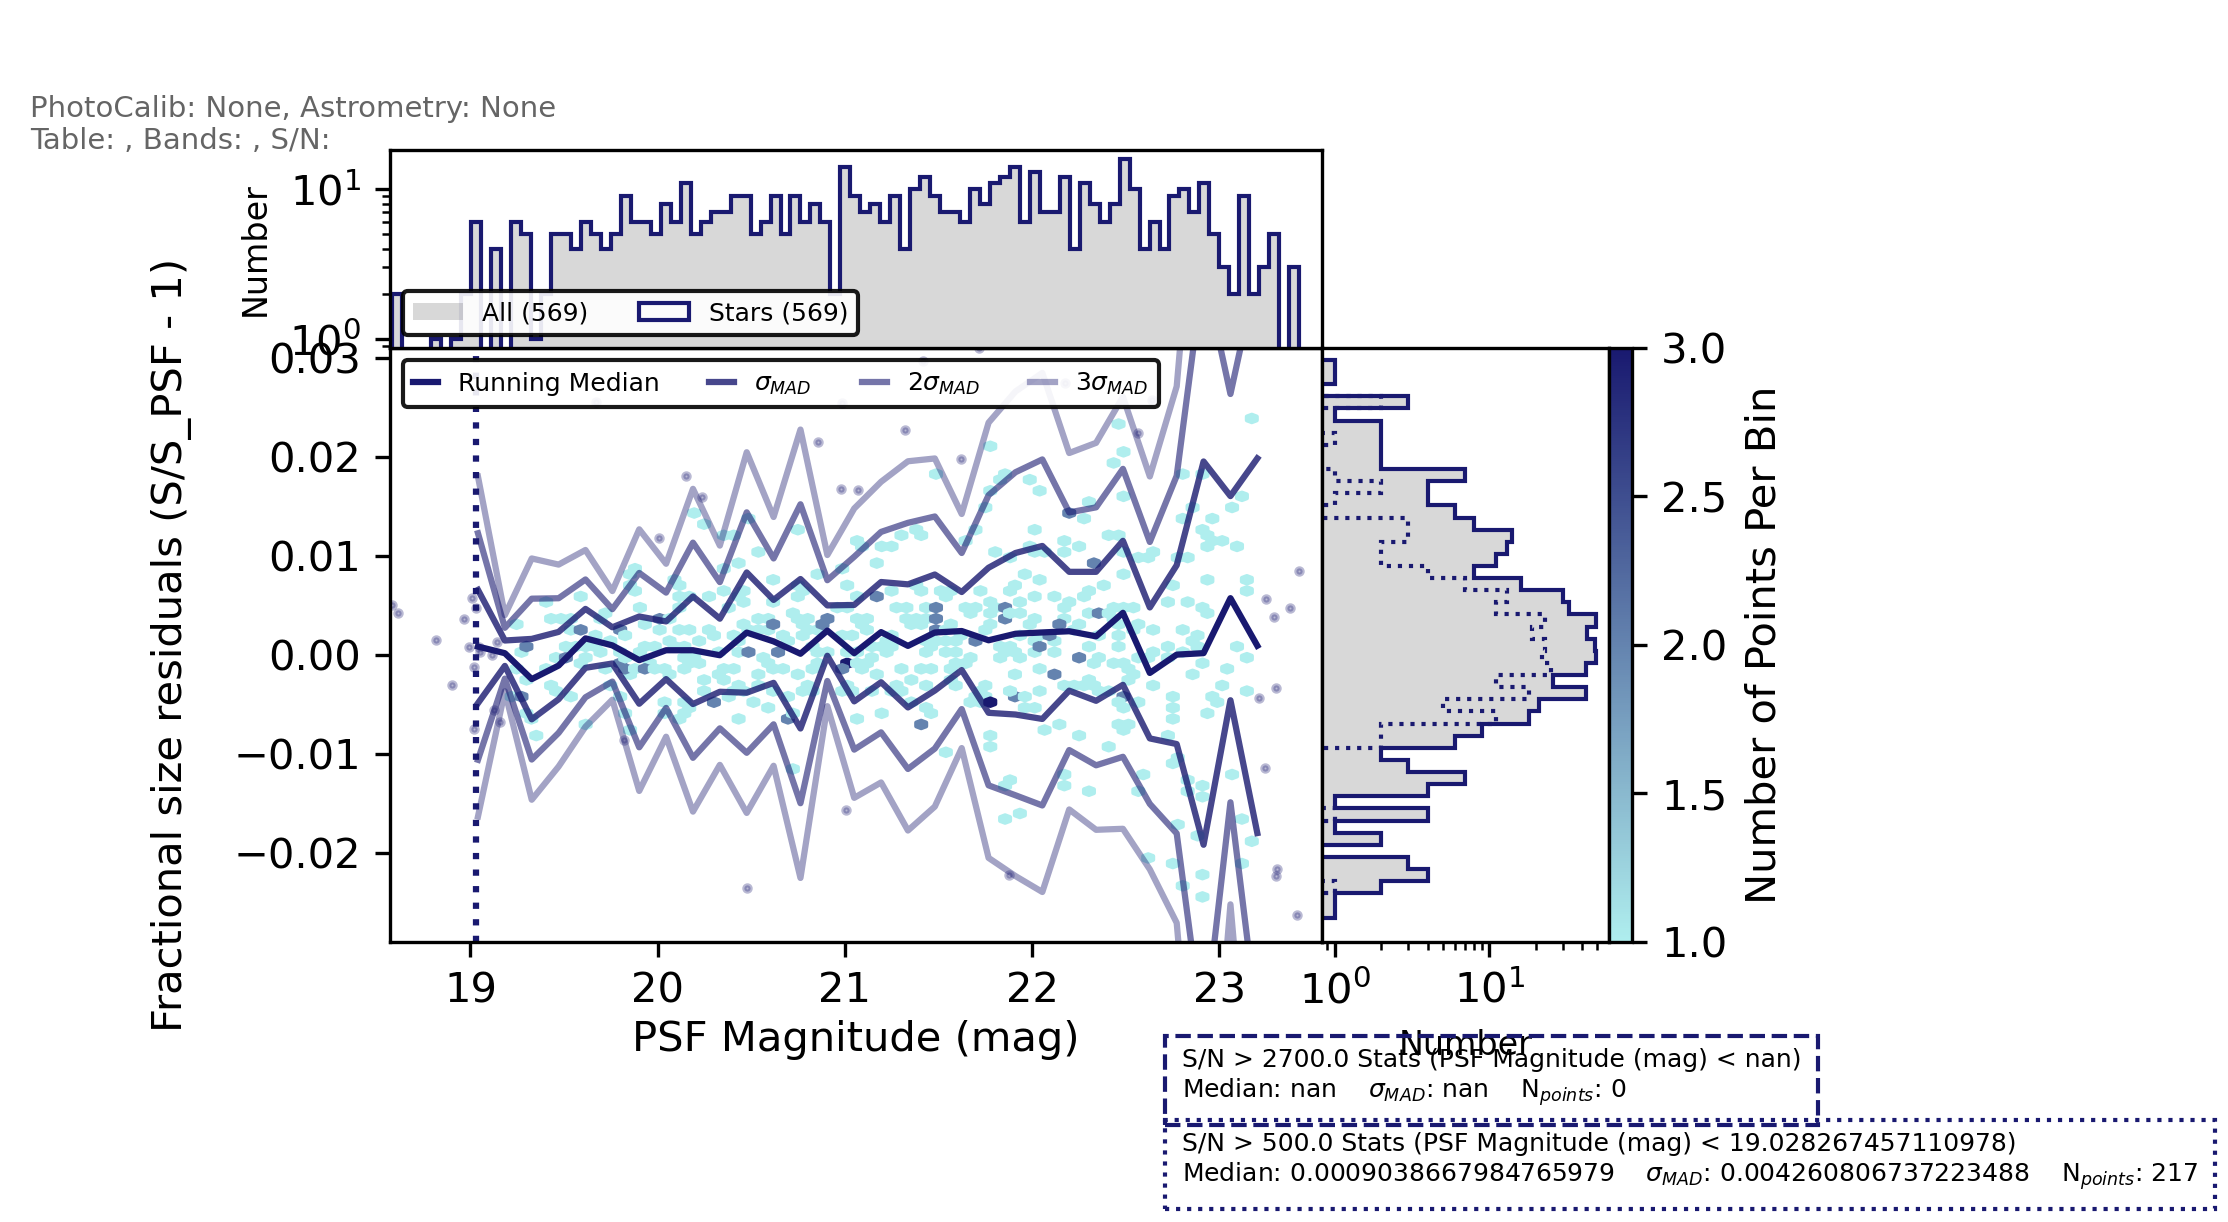

In [19]:
# later keyword arguments will not be required going forward
results = plot(objectTable, band='i', skymap=None, plotInfo=_StandinPlotInfo())

## How it works 

### Terminology

Data Types
* Scalar - Something that is number like (int, float, numpy.float32 etc.)
* Vector - Something that is ndarray like
* KeyedData - Anything that is indexed by a string that can return a Vector, or Scalar

Analysis Structures
* ConfigurableAction - generic interface for function like objects (actions) that have state which can be set during configuration
* AnalysisAction - A ConfigurableAction subclass that is specialized for actions that function in analysis contexts
* AnalysisTool - A top level "container" of multiple AnalysisActions which performs one type of analysis

Below we dive into the later two in more detail

### Using AnalysisActions

* These are the atomic bits of analysis_tools; They can be combined together to make more complex actions, or used as part of an AnalysisTool
* Show some examples of using configurable actions like standalone functions. This is intended to provide users with more intution about how configurable actions work.
* Examples with KeyedDataActions, VectorActions (including selectors), and ScalarActions
* Show examples of configuration

In [20]:
from lsst.analysis.tools.actions.vector import CalcShapeSize, MagColumnNanoJansky

Let's create an example AnalysisAction to compute the measured PSF size for a set of stars from an object catalog.

In [21]:
sizeCalculator = CalcShapeSize()

In [22]:
# Inspect the configuration of this object.
pprint(sizeCalculator.toDict())

{'colXx': '{band}_ixx',
 'colXy': '{band}_ixy',
 'colYy': '{band}_iyy',
 'sizeType': 'determinant'}


In [23]:
# Inspect the required input schema, notice that we will need to provide the band information
sizeCalculator.getInputSchema()

(('{band}_ixx', numpy.ndarray[typing.Any, numpy.dtype[+ScalarType]]),
 ('{band}_iyy', numpy.ndarray[typing.Any, numpy.dtype[+ScalarType]]),
 ('{band}_ixy', numpy.ndarray[typing.Any, numpy.dtype[+ScalarType]]))

In [24]:
size = sizeCalculator(objectTable, band='i')
print(size)

objectId
3495976385350991873    1.534004
3495976385350991874    1.909633
3495976385350991875    1.403695
3495976385350991876    2.364047
3495976385350991877    1.596875
                         ...   
3495967589258000052         NaN
3495967589258000053         NaN
3495967589258000054         NaN
3495967589258000055         NaN
3495967589258000056         NaN
Length: 101372, dtype: float64


In [25]:
# Another example, this time to convert fluxes to magnitudes
mag = MagColumnNanoJansky(vectorKey='{band}_psfFlux')(objectTable, band='i')

# Notice that the line above is equiavalent to the following
mag_alternate = MagColumnNanoJansky(vectorKey='i_psfFlux')(objectTable)

assert np.allclose(mag, mag_alternate, equal_nan=True)

(0.0, 5.0)

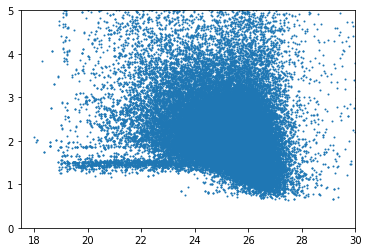

In [26]:
plt.figure()
plt.scatter(mag, size, s=1)
plt.xlim(17.5, 30.)
plt.ylim(0, 5)

Let's remake that simple plot now selecting only the stars

In [27]:
from lsst.analysis.tools.actions.vector import StarSelector

In [28]:
star_selection = StarSelector()(objectTable, band='i')

(0.0, 5.0)

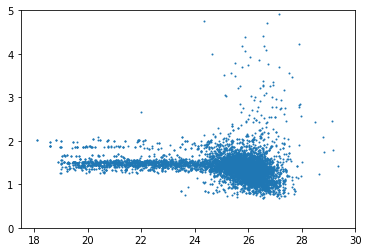

In [29]:
plt.figure()
plt.scatter(mag[star_selection], size.values[star_selection], s=1)
plt.xlim(17.5, 30.)
plt.ylim(0, 5)

We can also chain together AnalysisActions, as in the following example that produces an equivalent plot. The `analysis_tools` package frequently uses this approach of chaining together AnalysisActions.

(0.0, 5.0)

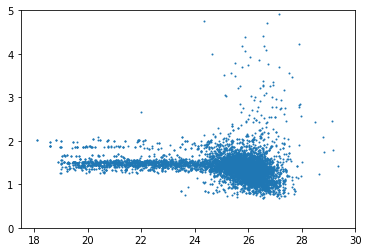

In [30]:
from lsst.analysis.tools.actions.vector import DownselectVector
from lsst.analysis.tools.actions.keyedData import AddComputedVector

band = "i"
objectTable = AddComputedVector(action=CalcShapeSize(), keyName="size")(objectTable, band=band)

# Note type(objectTable) is now a python dictionary instead of a pandas table, but since both
# "quack" like KeyedData so they can be used interchangably

objectTable = AddComputedVector(
    action=MagColumnNanoJansky(vectorKey='{band}_psfFlux'),
    keyName="mag"
)(objectTable, band=band)

size = DownselectVector(vectorKey="size", selector=StarSelector())(objectTable, band=band)
mag = DownselectVector(vectorKey="mag", selector=StarSelector())(objectTable, band=band)

plt.figure()
plt.scatter(mag, size, s=1)
plt.xlim(17.5, 30.)
plt.ylim(0, 5)

### Generic interface for data
Actions are not restricted to tables or products loaded from the butler, KeyedData could also be things like dictionaries of numpy arrays.

In [31]:
import lsst.analysis.tools.actions
dir(lsst.analysis.tools.actions)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'keyedData',
 'plot',
 'scalar',
 'vector']

In [32]:
from lsst.analysis.tools.actions.scalar import StdevAction

# create some KeyedData
data = {"randomData": np.random.normal(0, 3, 100)}

# initialize an action, setting it to use the key set above
action = StdevAction(vectorKey="randomData")

# Run the action and print the results
print(f"The standard deviation is {action(data)}")

The standard deviation is 3.0533684603927043


### Three conceptual steps in an `AnalysisTool`: prep, process, produce

As mentioned AnalysisTools can be thought of as executable containers of AnalysisActions. There are three different AnalysisActions, referred to as stages, named prep, process, and produce.
* Prep - Responsible for any initial selection and filtering of data
* Process - This is where any transformations or derived data should be computed
* Produce - Generates final plot or metric objects

The following examples will:
* Walk through the three stages of running an analysis tool in sequential lines of code, passing the output of one step as input to the next step
* Examine intermediate results

dict_keys(['i_psfFlux', 'i_ixx', 'i_iyy', 'i_ixy', 'i_ixxPSF', 'i_iyyPSF', 'i_ixyPSF', 'i_extendedness', 'patch', 'i_psfFluxErr'])
dict_keys(['mags', 'fracDiff', 'eDiff', 'e1Diff', 'e2Diff', 'starSelector', 'patchWhole', 'xStars', 'psfFlux', 'psfFluxErr', 'patch', 'yStars', 'starsHighSNMask', 'starsLowSNMask', 'i_lowSNStars_median', 'i_lowSNStars_sigmaMad', 'i_lowSNStars_count', 'i_lowSNStars_approxMag', 'i_highSNStars_median', 'i_highSNStars_sigmaMad', 'i_highSNStars_count', 'i_highSNStars_approxMag', 'highSnThreshold', 'lowSnThreshold'])


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-4.1.0/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


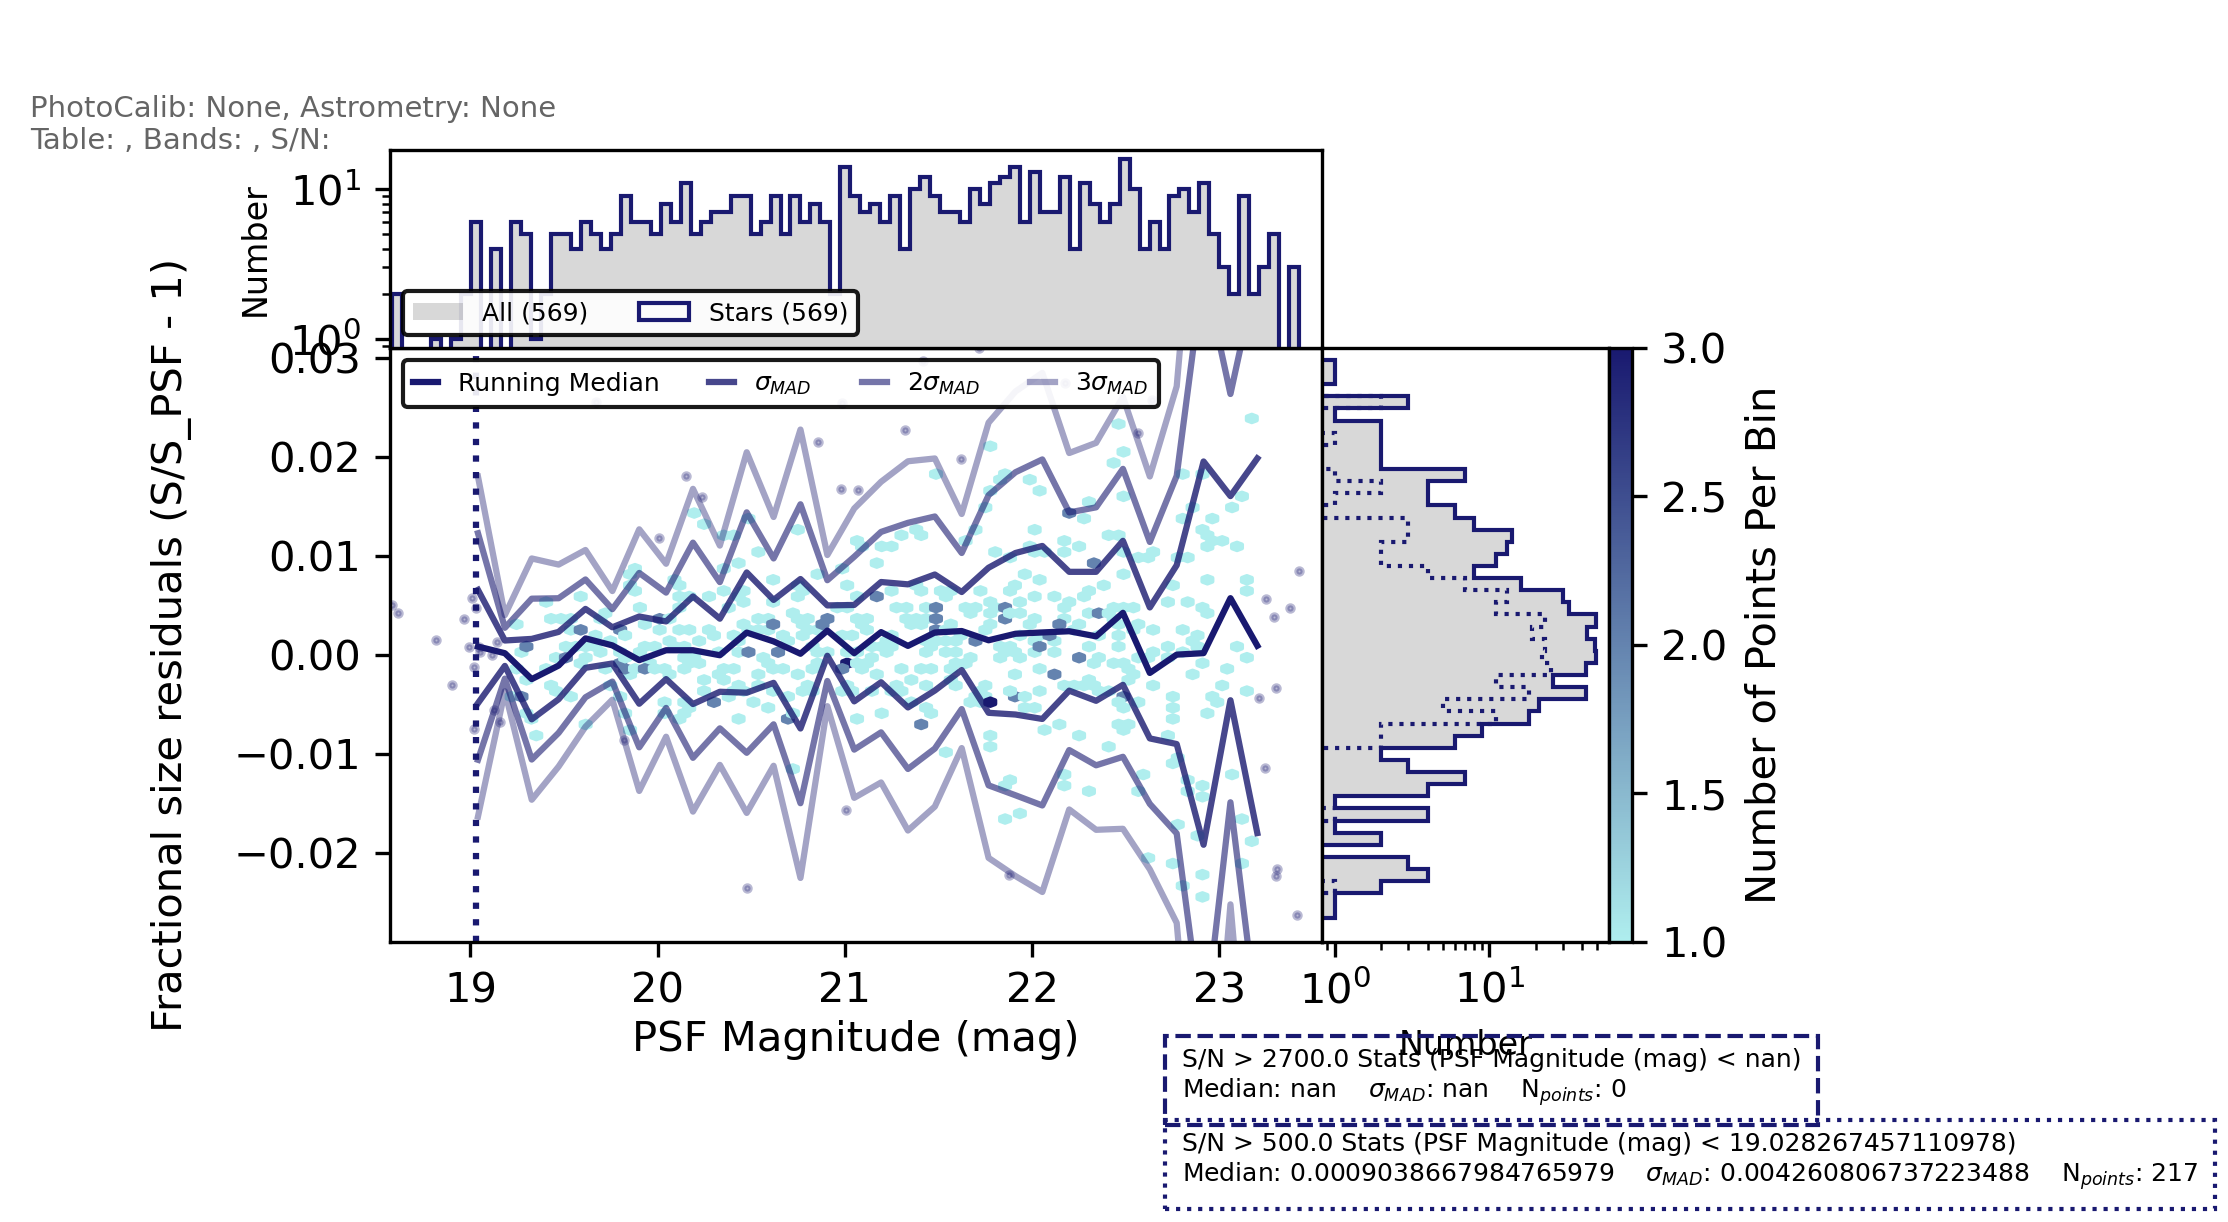

In [33]:
# make a new instance of the AnalysisPlot we used earlier
plot = ShapeSizeFractionalDiffScatterPlot()
plot.produce.addSummaryPlot = False

# This helps simplify some of the configuration
# by setting keys which are needed later to be
# loaded by earlier steps, it happens
# automatically when the AnalysisTool is
# used as a single unit.
plot.populatePrepFromProcess()

# Run the action by stepping through each stage
stage1 = plot.prep(objectTable, band='i')
print(stage1.keys())
stage2 = plot.process(stage1, band='i')
print(stage2.keys())
figure = plot.produce(stage2, band='i', skymap=None, plotInfo=_StandinPlotInfo())


## Workflow examples

### Running analysis_tools as part of a pipeline

* **All examples in this notebook should use the simple pipeline executor** (here is how you do it in a notebook)
* We have a PipelineTask for each data product. A task can run multiple AnalysisTools that each produce a set of plots or set of metrics and are subclasses of AnalysisPipelineTask.
* Discuss an example yaml pipeline file (load the yaml)
* Provide the command to run the pipeline
* Show how to configure the pipeline, e.g., turning on or off different metrics and plots or changing other parameters

## Pipeline
This is a copy of the coaddQualityCore pipeline in analysis_tools, reproduced here for reference
```
description: |
  Tier1 plots and metrics to assess coadd quality
tasks:
  analyzeObjectTableCore:
    class: lsst.analysis.tools.tasks.ObjectTableTractAnalysisTask
    config:
      connections.outputName: objectTableCore
      plots.shapeSizeFractionalDiffScatter: ShapeSizeFractionalDiffScatterPlot
      metrics.shapeSizeFractionalMetric: ShapeSizeFractionalMetric
      plots.e1DiffScatter: E1DiffScatterPlot
      metrics.e1DiffScatterMetric: E1DiffMetric
      plots.e2DiffScatter: E2DiffScatterPlot
      metrics.e2DiffScatterMetric: E2DiffMetric
      metrics.skyFluxStatisticMetric: SkyFluxStatisticMetric
      metrics.skyFluxStatisticMetric.applyContext: CoaddContext
      python: |
        from lsst.analysis.tools.analysisPlots import *
        from lsst.analysis.tools.analysisMetrics import *
        from lsst.analysis.tools.contexts import *
  catalogMatchTract:
    class: lsst.analysis.tools.tasks.catalogMatch.CatalogMatchTask
    config:
      bands: ['u', 'g', 'r', 'i', 'z', 'y']
  refCatObjectTract:
    class: lsst.analysis.tools.tasks.refCatObjectAnalysis.RefCatObjectAnalysisTask
    config:
      bands: ['u', 'g', 'r', 'i', 'z', 'y']
      ```

In [34]:
from lsst.ctrl.mpexec import SimplePipelineExecutor
from lsst.pipe.base import Pipeline

# set up an output collection with your username
#outputCollection = "u/nate2/analysisToolsExample"
outputCollection = "u/bechtol/analysisToolsExample"

# this can be skipped if you already have a read writable butler setup (above is read only)
butlerRW = SimplePipelineExecutor.prep_butler(repo, inputs=[collection], output=outputCollection)

# load in the pipeline to run
pipeline = Pipeline.from_uri("$ANALYSIS_TOOLS_DIR/pipelines/coaddQualityCore.yaml")

# override a configuration within a certain AnalysisTool
configKey = "plots.shapeSizeFractionalDiffScatter.prep.selectors.snSelector.threshold"
pipeline.addConfigOverride("analyzeObjectTableCore", configKey, 400)

bands = ['g', 'r', 'i', 'z']
pipeline.addConfigOverride("analyzeObjectTableCore", "bands", bands)
pipeline.addConfigOverride("catalogMatchTract", "bands", bands)
pipeline.addConfigOverride("refCatObjectTract", "bands", bands)

# restrict processing to the same dataId used above
whereString = "tract = 9813 AND skymap = 'hsc_rings_v1'"

# Prevent the executor from dumping plots into the notebook
backend_ =  mpl.get_backend() 
mpl.use("Agg")

executor = SimplePipelineExecutor.from_pipeline(pipeline, where=whereString, butler=butlerRW)
quanta = executor.run(True)

# Restore the ability for plots to be put into the notebook
mpl.use(backend_)

# If you only want to run one plot in a task in the pipeline do the following prior to execution
# pipeline.addConfigOverride("analyzeObjectTableCore", "plots", None)
# pipeline.addConfigOverride("analyzeObjectTableCore", "plots", ShapeSizeFractionalDiffScatterPlot)

PermissionError: [Errno 13] Permission denied: '/fs/ddn/sdf/group/rubin/sandbox/bechtol/rc2_subset/SMALL_HSC/u/bechtol/analysisToolsExample/20220907T190637Z'

### Inspect the results

In [ ]:
# refresh our read-only butler to see the changes made. (it's generally a
# good idea to work on read-only things)
butler.registry.refresh()

# see what datasets exist; there should now be objectTableCore_metrics
# for d in sorted(butler.registry.queryDatasetTypes()): print(d.name)

# get the metric that was written
refs = sorted(butler.registry.queryDatasets("objectTableCore_metrics", collections=outputCollection))
refs[0].dataId
objectTable_metrics = butler.get("objectTableCore_metrics", dataId=refs[0].dataId, collections=outputCollection)
pprint(objectTable_metrics)

### Reconstruct the inputs to an analysis_tool

Analysis(Tools/Actions) allow the exact state of and AnalysisTools to be saved into the butler when a pipeline is run. This allows a user to 'reconstruct' things as they were when the tools were executed. This aids in debugging and deep diving into the data.

Below is an example of reconstructing one of the tasks that was run in the Pipeline above.

In [35]:
from lsst.analysis.tools.tasks.reconstructor import reconstructAnalysisTools

# Read in just one task
label = "analyzeObjectTableCore"
taskState, inputData = reconstructAnalysisTools(butler, collection=outputCollection, label=label, dataId=dataId, callback=None)
pprint(taskState)
pprint(inputData)

LookupError: Dataset analyzeObjectTableCore_config with data ID {} could not be found in collections ('u/bechtol/analysisToolsExample',).

Notice that we have access to the object table used to produce the diagnostics.

In [ ]:
inputData["data"]

We can now reproduce diagnostic plots.

In [ ]:
# Rerun one of the plots
taskState.plots.shapeSizeFractionalDiffScatter(
    inputData['data'],
    band='i',
    skymap=None,
    plotInfo=_StandinPlotInfo()
)

# change some configuration to see the differences
taskState.plots.shapeSizeFractionalDiffScatter.prep.selectors.snSelector.threshold = 50
taskState.plots.shapeSizeFractionalDiffScatter(
    inputData['data'],
    band='i',
    skymap=None,
    plotInfo=_StandinPlotInfo()
)

# This could be run in stages like the above example to investigate issues

## Make a custom analysis tool

Let's take a look at what at how a metric is implemented before creating a new AnalysisTool

In [ ]:
# This is copied from lsst.analysis.tools.analysisMetrics.limitingMagnitudeMetric

from lsst.analysis.tools.interfaces import AnalysisMetric

class FiveSigmaPointSourceDepthMetric(AnalysisMetric):
    """Calculate the five-sigma point source depth of a visit, based on the
    PSF flux and its reported error. By default the calculation selects
    objects between 4.75 < S/N < 5.25, but these limits are configurable.
    The flux type to use for selection is also configurable. Both the median
    and mean 5-sigma depths are returned.
    """

    parameterizedBand: bool = False

    def setDefaults(self):
        super().setDefaults()

        self.prep.selectors.starSelector = StarSelector()
        self.prep.selectors.starSelector.columnKey = "extendedness"

        self.prep.selectors.snSelector = SnSelector()
        self.prep.selectors.snSelector.fluxType = "psfFlux"
        # Select between 4.75 < SNR < 5.25 to get a decent sample:
        self.prep.selectors.snSelector.threshold = 4.75
        self.prep.selectors.snSelector.maxSN = 5.25

        self.process.buildActions.mags = MagColumnNanoJansky(vectorKey="psfFlux")
        self.process.calculateActions.median5sigmaDepth = MedianAction(vectorKey="mags")
        self.process.calculateActions.mean5sigmaDepth = MeanAction(vectorKey="mags")

        self.produce.units = {
            "median5sigmaDepth": "mag",
            "mean5sigmaDepth": "mag",
        }


As discussed above, AnalysisTools (AnalysisMetric is a specialized subclass) are container classes for AnalysisActions.

To make deploying metrics and plots as easy as possible Analysis(Metric/Plots) contain default AnalysisActions that enable new AnalysisTools to be created by simply setting configuration.

The default prep action allow specifiying keys to load from input data, and applying selectors. If calling an AnalysisTool directly, the required keys can be set automatically.

The default process action itself has 3 stages to it,
* buildActions - actions which build derived data
* filterActions - If derived data needs to be filtered it can go here
* calculateActions - Any final calculations that may need done can be put here

These stages run sequentually, and any stage are allowed to have no actions set to run in them.

AnalysisMetrics have a default action which allow values produced in process to be mapped to lsst.verify.Measurements

The produce stage of AnalysisPlots do not have a default, as this is where the plot to produce is to be set.

In [ ]:
from lsst.analysis.tools.actions import MedianAction

class DemoMetric(AnalysisMetric):
    def setDefaults(self):
        # select on high signal to noise obejcts
        # add in a signal to noise selector
        self.prep.selectors.snSelector = SnSelector()
        
        # set what key the selector should use when deciding SNR
        self.prep.selectors.snSelector.fluxType = "psfFlux"
        
        # select what threshold value is desireable for the selector
        self.prep.selectors.snSelector.threshold = 1000
        
        # the final name in the qualification is used as a key to insert
        # the calculation into KeyedData
        self.process.calculateActions.medianValueName = MedianAction(vectorKey="Some_key")
        
        # tell the metic what the units are for the quantity
        self.produce.units = {"medianValueName": "Jy"}
        
        # Rename the quanity prior to producing the Metric
        # (useful for resuable workflows that set a name toward the end of computation)
        self.produce.newNames = {"medianValueName": "DemoMetric"}

# make some fake data
fluxes = np.random.normal(100, 100000, 500)
data = {"psfFlux": fluxes, "psfFluxErr": np.sqrt(fluxes)}
metric = DemoMetric()(data)